In [1]:
%matplotlib inline
import matplotlib
# matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import seaborn as sns
from IPython.display import Image
import pydotplus
import pandas as pd
import os
from scipy import stats
import math

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### DATA Import

In [2]:
LVDTDataSet = pd.read_csv("Enter your dataset path",
            thousands = ',',
            encoding = 'euc-kr')

df = pd.DataFrame(LVDTDataSet)
# df = df.dropna()
df

,idx,lineCode,processCode,hogiName,barcodeName,carType,processId,volvoAccount,status,worker,inspDate,idx.1,sequence,measureData,lvdt_idx
0,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,1,1,1.83,744786
1,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,2,2,1.65,744786
2,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,3,3,1.80,744786
3,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,4,4,1.26,744786
4,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,5,5,0.29,744786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319291,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319292,15,0.65,810370
1319292,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319293,16,0.78,810370
1319293,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319294,17,0.79,810370
1319294,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319295,18,1.74,810370


### DataFrame 구조 파악

In [3]:
df.describe()
df.columns
df.info()
# df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319296 entries, 0 to 1319295
Data columns (total 15 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   idx           1319296 non-null  int64  
 1   lineCode      1319296 non-null  object 
 2   processCode   1319296 non-null  object 
 3   hogiName      1319296 non-null  int64  
 4   barcodeName   1319296 non-null  object 
 5   carType       1319296 non-null  object 
 6   processId     1319296 non-null  object 
 7   volvoAccount  1319296 non-null  object 
 8   status        1319296 non-null  object 
 9   worker        1319296 non-null  int64  
 10  inspDate      1319296 non-null  object 
 11  idx.1         1319296 non-null  int64  
 12  sequence      1319296 non-null  int64  
 13  measureData   1319296 non-null  float64
 14  lvdt_idx      1319296 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 151.0+ MB


### status column Null / NaN check

In [4]:
df['status'].isnull().sum()

0

In [5]:
dfResult = df.groupby('status').hogiName.sum()
dfResult

status
NG       4003
OK    1315293
Name: hogiName, dtype: int64

### PASS/FAIL Data 수량 비교

([<matplotlib.axis.XTick at 0x2610df04550>,
 [Text(0, 0, 'FAIL'), Text(1, 0, 'PASS')])

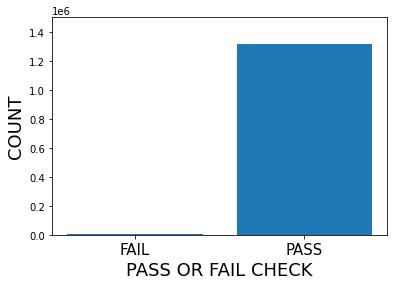

In [6]:
label = ['FAIL', 'PASS']
index = np.arange(len(label))
plt.bar(index, dfResult)
plt.title('', fontsize=20)
plt.xlabel('PASS OR FAIL CHECK', fontsize=18)
plt.ylabel('COUNT', fontsize=18)
plt.ylim([0, 1500000])
plt.xticks(index, label, fontsize=15)

### OK판정을 받는 measureData / NG판정을 받는 measureData 분포 비교

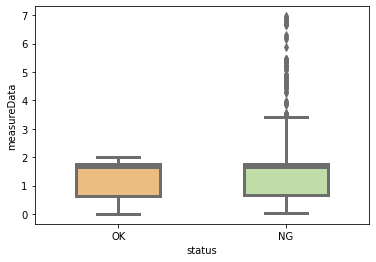

In [7]:
sns.boxplot(x = 'status', 
            y = 'measureData', 
            data = df, palette = 'Spectral', 
            linewidth = 3, width = 0.5)

plt.xticks(range(2), ['OK', 'NG'])
plt.show()

In [8]:
OKArray = []
NGArray = []
for i in range(len(df['measureData'])):
    if df['status'][i] == 'OK':
        OKArray.append(df['measureData'][i])
    else:
        NGArray.append(df['measureData'][i])

In [9]:
data = {
    '1사분위': [np.quantile(OKArray, .25), np.quantile(NGArray, .25)],
    '2사분위': [np.quantile(OKArray, .5), np.quantile(NGArray, .5)],
    '3사분위': [np.quantile(OKArray, .75), np.quantile(NGArray, .75)],
    '범위': [np.quantile(OKArray, .75) - np.quantile(OKArray, .25), 
           np.quantile(NGArray, .75) - np.quantile(NGArray, .25)],
    '최소값': [np.min(OKArray), np.min(NGArray)],
    '최대값': [np.max(OKArray), np.max(NGArray)]
    
}

data_df = pd.DataFrame(data, index=['OK', 'NG'])
data_df

,1사분위,2사분위,3사분위,범위,최소값,최대값
OK,0.64,1.64,1.76,1.12,0.00,2.00
NG,0.66,1.66,1.76,1.10,0.04,6.96


# T-test

> 귀무가설: 
Ho : μ1 = μ2

> 대립가설:
H1 :μ1 ≠ μ2

In [18]:
t_stat, p_val = stats.ttest_ind(OKArray, NGArray, equal_var=True, alternative='two-sided')
print('t-통계량 : {}, p_value:  {}'.format(t_stat, p_val))

t-통계량 : -8.39855987568721, p_value:  4.524258128747527e-17


*p_value의 값이 0.05보다 작으므로 귀무가설 기각 후, OK판정을 낸 measureData와 NG판정을 낸 measureData 집단 간 차이가 있음을 확인*

### 상관관계 분석을 위한 status 컬럼 재정의

In [11]:
df.loc[df.status == 'OK','status2']=math.floor(0)
df.loc[df.status == 'NG','status2']=math.floor(1)

# df.loc[df.status == 'OK','status2']=0.0
# df.loc[df.status == 'NG','status2']=1.0
df

,idx,lineCode,processCode,hogiName,barcodeName,carType,processId,volvoAccount,status,worker,inspDate,idx.1,sequence,measureData,lvdt_idx,status2
0,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,1,1,1.83,744786,0.0
1,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,2,2,1.65,744786,0.0
2,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,3,3,1.80,744786,0.0
3,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,4,4,1.26,744786,0.0
4,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,5,5,0.29,744786,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319291,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319292,15,0.65,810370,0.0
1319292,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319293,16,0.78,810370,0.0
1319293,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319294,17,0.79,810370,0.0
1319294,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319295,18,1.74,810370,0.0


### 상관관계 분석

In [12]:
df2 = df[['measureData','status2']]

corrArray = df2.values

correlation_matrix = np.corrcoef(corrArray.T)
print(correlation_matrix)

[[1.         0.00731177]
 [0.00731177 1.        ]]


### inspDate2 컬럼 생성

In [13]:
df['inspDate2'] = df.inspDate.str.split(' ').str[0]
df

,idx,lineCode,processCode,hogiName,barcodeName,carType,processId,volvoAccount,status,worker,inspDate,idx.1,sequence,measureData,lvdt_idx,status2,inspDate2
0,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,1,1,1.83,744786,0.0,2022-01-03
1,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,2,2,1.65,744786,0.0,2022-01-03
2,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,3,3,1.80,744786,0.0,2022-01-03
3,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,4,4,1.26,744786,0.0,2022-01-03
4,744786,B1,LVDT,1,MFR01089AB:2201030023V,VOL,LVDT1,B1-LVDT1-A,OK,223635,2022-01-03 00:00:15,5,5,0.29,744786,0.0,2022-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319291,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319292,15,0.65,810370,0.0,2022-01-16
1319292,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319293,16,0.78,810370,0.0,2022-01-16
1319293,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319294,17,0.79,810370,0.0,2022-01-16
1319294,810370,B3,LVDT,1,MFR01089AB:2201162312V,VOL,LVDT1,B3-LVDT1-A,OK,223635,2022-01-16 07:31:02,1319295,18,1.74,810370,0.0,2022-01-16


### 날짜별 불량 개수

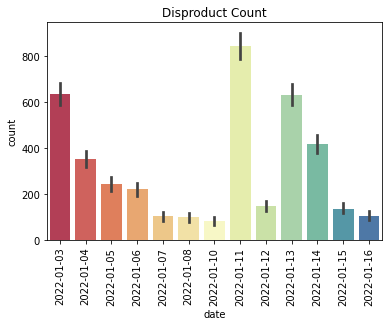

In [14]:
sns.barplot(data=df, x="inspDate2", y="status2", estimator=sum, palette = 'Spectral')
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('count')
plt.title('Disproduct Count');

plt.show()

In [15]:
testPd = pd.DataFrame(df.groupby('inspDate2').status.value_counts().reset_index(name='count'))
testPd

# print( df.groupby('inspDate2').status.value_counts().reset_index(name='count'))

,inspDate2,status,count
0,2022-01-03,OK,109581
1,2022-01-03,NG,632
2,2022-01-04,OK,108471
3,2022-01-04,NG,351
4,2022-01-05,OK,114735
5,2022-01-05,NG,244
6,2022-01-06,OK,115998
7,2022-01-06,NG,220
8,2022-01-07,OK,98503
9,2022-01-07,NG,102


### 날짜별 양/불 개수

In [16]:
testPd = pd.DataFrame(df.groupby('inspDate2').status.value_counts().reset_index(name='count'))

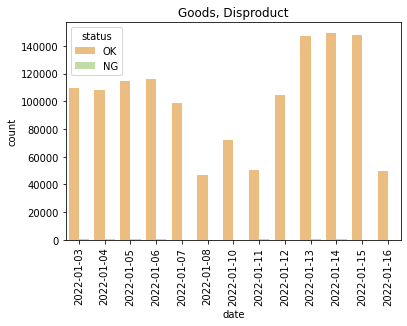

In [17]:
sns.barplot(data=testPd, x="inspDate2", y="count", estimator=sum, hue="status", palette = 'Spectral')
plt.xticks(rotation=90)
plt.xlabel('date')
plt.ylabel('count')
plt.title('Goods, Disproduct');

plt.show()